# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# import libraries here
import pylab as plt
import seaborn as sns
import datetime
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests as req
from bs4 import BeautifulSoup as bs

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
# your answer here
temp = pd.read_csv('Temp_States.csv', sep=',')

#### Print `temp`

In [7]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [8]:
# your answer here
temp.info(memory_usage='deep')
#we have two object columns and one float column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 1.1 KB


#### Select the rows where state is New York

In [12]:
# your answer here
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [13]:
# your answer here
temp.loc[temp['State'] == 'New York'].describe()

,Temperature
count,3.000000
mean,10.740741
std,8.133404
min,3.333333
25%,6.388889
50%,9.444444
75%,14.444444
max,19.444444


#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
# your answer here
calor = temp.loc[temp['Temperature'] > 15.00]

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [22]:
# your answer here
calor.City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [43]:
# your answer here
temp.loc[temp['Temperature'].between(15.00,19.99)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [40]:
# your answer here
temp.groupby(['State'])['Temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Connecticut,2.0,15.833333,1.964186,14.444444,15.138889,15.833333,16.527778,17.222222
New Jersey,2.0,21.111111,1.571348,20.000000,20.555556,21.111111,21.666667,22.222222
New York,3.0,10.740741,8.133404,3.333333,6.388889,9.444444,14.444444,19.444444


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [45]:
# your answer here
employee = pd.read_csv('employee.csv')

In [55]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [ ]:
#### Explore the data types of the Temp dataframe. Comment your results

In [46]:
# your answer here
employee.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 3.0 KB


In [ ]:
#We have 5 object columns  and 2 int columns and no nulls

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:ylabel='Frequency'>

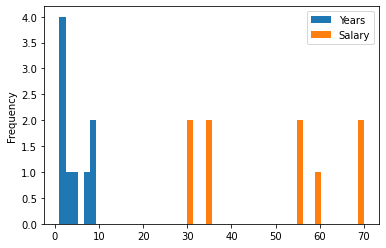

In [58]:
# your answer here
employee.plot.hist(bins=50)

#### What's the average salary in this company?

In [59]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [60]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [61]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [62]:
# your answer here
bajo = employee.loc[employee['Salary'] == 30]

In [63]:
bajo

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [64]:
# your answer here
david = employee.loc[employee['Name'] == 'David']

In [68]:
david.reset_index(inplace=True)
david

,level_0,index,Name,Department,Education,Gender,Title,Years,Salary
0,0,2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [69]:
# your answer here
david['Salary']

0    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [70]:
# your answer here
employee.loc[employee['Title']== 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [75]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [76]:
# your answer here- 2nd method
print(employee.iloc[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [77]:
# your answer here
employee.loc[(employee['Title']== 'associate') & (employee['Salary']>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [85]:
# your answer here
employee.Years.unique()

array([1, 2, 4, 3, 8, 7])

In [90]:
bins = [0, 1, 3, 5, 7, np.inf]
names = ['junior', 'middle', 'senior', 'manager', 'senior manager']

employee['catyears'] = pd.cut(employee['Years'], bins, labels=names)

In [91]:
employee.groupby(['catyears'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
catyears,,,,,,,,
junior,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0
middle,4.0,42.5,14.433757,30.0,30.0,42.5,55.0,55.0
senior,1.0,35.0,NaN,35.0,35.0,35.0,35.0,35.0
manager,1.0,60.0,NaN,60.0,60.0,60.0,60.0,60.0
senior manager,2.0,70.0,0.000000,70.0,70.0,70.0,70.0,70.0


####  What is the average Salary per title?

In [97]:
# your answer here
employee.groupby(['Title'])['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
VP,2.0,70.000000,0.000000,70.0,70.0,70.0,70.0,70.0
analyst,4.0,32.500000,2.886751,30.0,30.0,32.5,35.0,35.0
associate,3.0,56.666667,2.886751,55.0,55.0,55.0,57.5,60.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

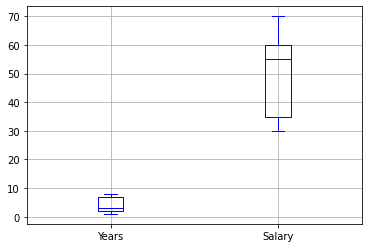

In [101]:
# draw boxplot here
employee.boxplot(color='b')

In [105]:
# print first quartile here
employee.describe().loc[['25%']]

,Years,Salary
25%,2.0,35.0


In [104]:
# print third quartile here
employee.describe().loc[['75%']]

,Years,Salary
75%,7.0,60.0


#### Is the mean salary per gender different?

In [128]:
# your answer here
Gender = employee.groupby(['Gender'])['Salary'].describe()[['mean']].T
Gender

Gender,F,M
mean,47.5,50.0


In [129]:
Gender['F']==Gender['M']

mean    False
dtype: bool

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [139]:
# your answer here
datos = employee.groupby(['Department']).agg({'Years':['mean','min','max'], 'Salary':['mean','min','max']})

In [140]:
datos

Years         Salary        
                mean min max   mean min max
Department                                 
HR          4.666667   2   8  45.00  30  70
IT          4.500000   1   8  48.75  30  70
Sales       2.500000   2   3  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [147]:
# your answer here
maxi_year = datos['Years']['max']-datos['Years']['min']

In [148]:
maxi_sal = datos['Salary']['max']-datos['Salary']['min']

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here